##### Task #1: Merge the 12 month data into single csv

In [1]:
import pandas as pd

# List of file names
file_names = ['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']

## Create an empty list to store the DataFrames
data_frames = []

# Iterate over the file names
for file_name in file_names:
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_name)
    
    # Append the data to the list of DataFrames
    data_frames.append(data)

# Concatenate the DataFrames in the list
merged_data = pd.concat(data_frames, ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('all_month_sales_data.csv', index=False)

print("Merged data saved to merged_sales_data.csv")

Merged data saved to merged_sales_data.csv


In [2]:
df = pd.read_csv('all_month_sales_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [4]:
# clean the data
df = df.dropna(how='all')
df = df.dropna(subset=['Order ID'])
df = df[df['Order Date'].str[0:2] != 'Or']



In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Question 1: What was the best month for sales? How much was earned that month?

In [6]:

# Add a month column    
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [7]:
# add a sales column
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [8]:
# Question 1: What was the best month for sales? How much was earned that month?
df.groupby('Month').sum()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


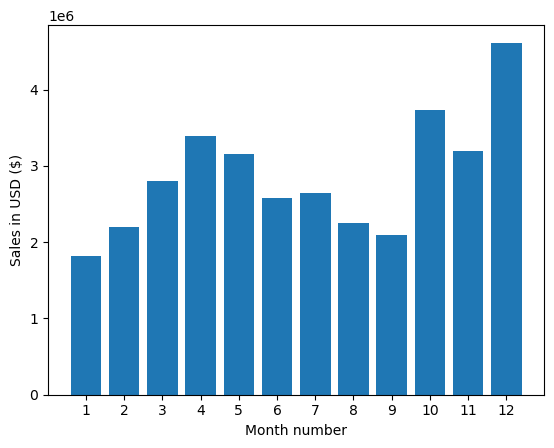

In [9]:
import matplotlib.pyplot as plt
months = range(1,13)
results = df.groupby('Month').sum()
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


In [10]:
# Question 2: What city had the heightest number of sales
# Add a city column 
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [11]:
df.groupby('City').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City (NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland (ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland (OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco (CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


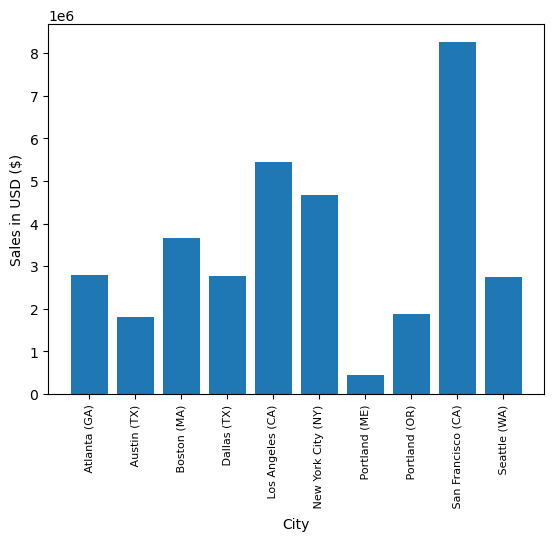

In [12]:
# create plot
results = df.groupby('City').sum()
cities = [city for city, df in df.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()


In [13]:
# Question 3: What time should we display advertisements to maximize the likelihood of customer's buying product?
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1
df.head()





C:\Users\Jawad Hussain\AppData\Local\Temp\ipykernel_1168\1998415025.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [14]:
df.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


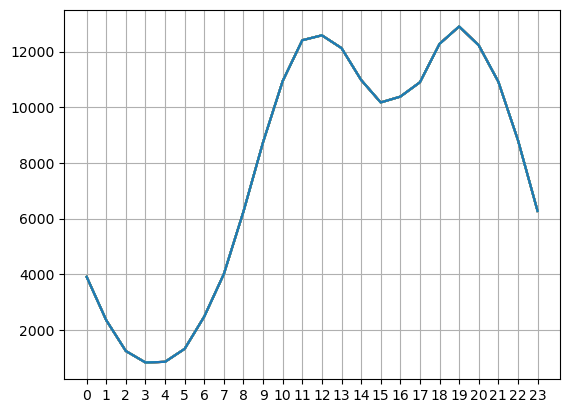

In [15]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()


In [16]:
# Question 4: What products are most often sold together?
df = df[df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_1 = df[['Order ID', 'Grouped']].drop_duplicates()
df_1.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [17]:
from itertools import combinations
from collections import Counter



# Preprocessing the data
df = df.dropna()  # Remove rows with missing data
df['Order ID'] = df['Order ID'].astype(str)
df['Product'] = df['Product'].astype(str)

# Group the data by Order ID and create a list of products for each order
order_group = df.groupby('Order ID')['Product'].apply(list)

# Perform market basket analysis
product_counts = Counter()

for order in order_group:
    # Generate all possible combinations of products in the order
    product_combinations = combinations(order, 2)
    # Update the co-occurrence counts
    product_counts.update(product_combinations)

# Get the most frequently co-occurring product pairs
top_product_pairs = product_counts.most_common(10)  # Adjust the number as per your preference

# Print the results
for pair, count in top_product_pairs:
    print(f"Products: {pair}, Co-occurrence Count: {count}")

Products: ('iPhone', 'Lightning Charging Cable'), Co-occurrence Count: 1005
Products: ('Google Phone', 'USB-C Charging Cable'), Co-occurrence Count: 987
Products: ('iPhone', 'Wired Headphones'), Co-occurrence Count: 447
Products: ('Google Phone', 'Wired Headphones'), Co-occurrence Count: 414
Products: ('Vareebadd Phone', 'USB-C Charging Cable'), Co-occurrence Count: 361
Products: ('iPhone', 'Apple Airpods Headphones'), Co-occurrence Count: 360
Products: ('Google Phone', 'Bose SoundSport Headphones'), Co-occurrence Count: 220
Products: ('USB-C Charging Cable', 'Wired Headphones'), Co-occurrence Count: 160
Products: ('Vareebadd Phone', 'Wired Headphones'), Co-occurrence Count: 143
Products: ('Lightning Charging Cable', 'Wired Headphones'), Co-occurrence Count: 92


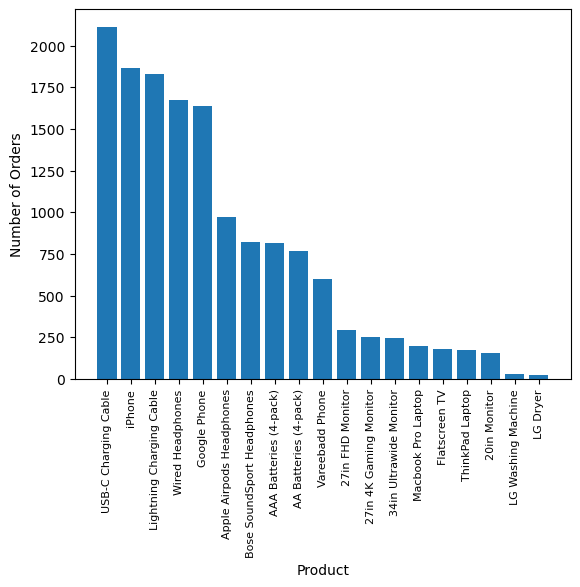

In [18]:
# Preprocessing the data
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Product'] = df['Product'].astype(str)

# Calculate the number of orders per product
product_orders = df['Product'].value_counts().reset_index()
product_orders.columns = ['Product', 'Number of Orders']

# Sort the products based on the number of orders
product_orders = product_orders.sort_values('Number of Orders', ascending=False)

# Plotting the bar chart
plt.bar(product_orders['Product'], product_orders['Number of Orders'])
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Number of Orders')
plt.xlabel('Product')
plt.show()

In [19]:
# Question 5: What product sold the most? Why do you think it sold the most?
# Preprocessing the data
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Calculate the total quantity sold for each product
product_sales = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the products based on the total quantity sold in descending order
product_sales = product_sales.sort_values('Quantity Ordered', ascending=False)

# Get the product that sold the most
most_sold_product = product_sales.iloc[0]['Product']
quantity_sold = product_sales.iloc[0]['Quantity Ordered']

# Print the results
print(f"The product that sold the most is {most_sold_product} with a total of {quantity_sold} units sold.")

The product that sold the most is USB-C Charging Cable with a total of 2292 units sold.


In [20]:
prices = df.groupby('Product')['Price Each'].mean()

# Print the results
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Jawad Hussain\AppData\Local\Temp\ipykernel_1168\303475811.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_sales['Product'], rotation='vertical', size=8)


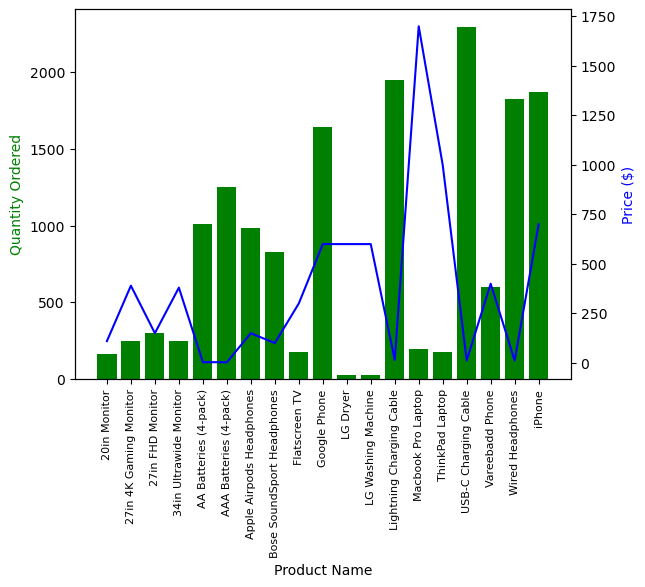

In [21]:
# Preprocessing the data
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Calculate the total quantity sold for each product
product_sales = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Calculate the average price for each product
prices = df.groupby('Product')['Price Each'].mean().reset_index()

# Create the figure and axes
fig, ax1 = plt.subplots()

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the bar chart for quantity ordered
ax1.bar(product_sales['Product'], product_sales['Quantity Ordered'], color='g')

# Plot the line chart for prices
ax2.plot(prices['Product'], prices['Price Each'], 'b-')

# Set labels and tick parameters
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product_sales['Product'], rotation='vertical', size=8)

# Display the plot
plt.show()



In [26]:


# Filter out rows where 'Order Date' is 'Order Date'
sales_data = sales_data[sales_data['Order Date'] != 'Order Date']

# Convert 'Quantity Ordered' and 'Price Each' columns to numeric types
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')

# Specify the custom date format for parsing 'Order Date'
date_format = '%m/%d/%y %H:%M'

# Parse the 'Order Date' column as datetime using the custom format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format=date_format)

# Calculate the total sales revenue
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
total_sales = sales_data['Total Sales'].sum()

# Calculate monthly sales revenue
sales_data['Month'] = sales_data['Order Date'].dt.month
monthly_sales = sales_data.groupby('Month')['Total Sales'].sum()

# Calculate top selling products
top_selling_products_quantity = sales_data.groupby('Product')['Quantity Ordered'].sum().nlargest(3)
top_selling_products_revenue = sales_data.groupby('Product')['Total Sales'].sum().nlargest(3)

# Handle missing or non-string values in 'Purchase Address' column
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1] if isinstance(x, str) else '')
sales_data['City'] = sales_data['City'].str.strip()  # Remove leading/trailing spaces

# Calculate sales by city
sales_by_city = sales_data.groupby('City')['Total Sales'].sum().nlargest(3)

# Calculate average order quantity
average_order_quantity = sales_data['Quantity Ordered'].mean()

# Print the report
print("Report: Sales Analysis\n")
print("1. Total Sales:")
print(f"The total sales revenue for the entire dataset is: ${total_sales}\n")

print("2. Monthly Sales:")
print("Monthly sales revenue:")
print(monthly_sales)
print()

print("3. Top Selling Products:")
print("Top selling products based on sales quantity:")
print(top_selling_products_quantity)
print()
print("Top selling products based on revenue:")
print(top_selling_products_revenue)
print()

print("4. Sales by City:")
print("Cities with the highest sales revenue:")
print(sales_by_city)
print()

print("5. Average Order Quantity:")
print(f"The average order quantity is: {average_order_quantity}\n")

print("Recommendations for Improvement:")
print("1. Promote the top-selling products.")
print("2. Target high-performing cities.")
print("3. Enhance product offerings.")
print("4. Optimize pricing strategies.")
print("5. Improve customer experience.")

Report: Sales Analysis

1. Total Sales:
The total sales revenue for the entire dataset is: $34492035.97

2. Monthly Sales:
Monthly sales revenue:
Month
1.0     1822256.73
2.0     2202022.42
3.0     2807100.38
4.0     3390670.24
5.0     3152606.75
6.0     2577802.26
7.0     2647775.76
8.0     2244467.88
9.0     2097560.13
10.0    3736726.88
11.0    3199603.20
12.0    4613443.34
Name: Total Sales, dtype: float64

3. Top Selling Products:
Top selling products based on sales quantity:
Product
AAA Batteries (4-pack)    31017.0
AA Batteries (4-pack)     27635.0
USB-C Charging Cable      23975.0
Name: Quantity Ordered, dtype: float64

Top selling products based on revenue:
Product
Macbook Pro Laptop    8037600.0
iPhone                4794300.0
ThinkPad Laptop       4129958.7
Name: Total Sales, dtype: float64

4. Sales by City:
Cities with the highest sales revenue:
City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Name: Total Sales, dtype: float64

5. Av

Report: Sales Analysis

1. Total Sales:
The total sales revenue for the entire dataset is: $34492035.97

2. Monthly Sales:
Monthly sales revenue:
Month
1.0     1822256.73
2.0     2202022.42
3.0     2807100.38
4.0     3390670.24
5.0     3152606.75
6.0     2577802.26
7.0     2647775.76
8.0     2244467.88
9.0     2097560.13
10.0    3736726.88
11.0    3199603.20
12.0    4613443.34
Name: Total Sales, dtype: float64

3. Top Selling Products:
Top selling products based on sales quantity:
Product
AAA Batteries (4-pack)    31017.0
AA Batteries (4-pack)     27635.0
USB-C Charging Cable      23975.0
Name: Quantity Ordered, dtype: float64

Top selling products based on revenue:
Product
Macbook Pro Laptop    8037600.0
iPhone                4794300.0
ThinkPad Laptop       4129958.7
Name: Total Sales, dtype: float64

4. Sales by City:
Cities with the highest sales revenue:
City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Name: Total Sales, dtype: float64

5. Average Order Quantity:
The average order quantity is: 1.1243828986286637

Recommendations for Improvement:
1. Promote the top-selling products.
2. Target high-performing cities.
3. Enhance product offerings.
4. Optimize pricing strategies.
5. Improve customer experience.